In [64]:
%matplotlib inline
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

In [65]:
import json
from pathlib import Path

import pandas as pd

json_file = Path("../results/classification_ablation_results.jsonl")

list_of_dicts = [json.loads(line) for line in json_file.open()]
D = pd.DataFrame(list_of_dicts)

keep_mask = D.keep != ''
ignore_mask = D.ignore != ''
D_add = D[keep_mask]
D_sub = D[ignore_mask];

In [66]:
system_f1 = D[~keep_mask & ~ignore_mask].set_index('dataset').f1

### Single feature groups

The two panels below show $F_1$ scores obtaining by using only a single group of features, both on individual datasets and in aggregate

In [67]:
by_keep_ns = D_add.groupby(('dataset', 'keep')).f1.mean().unstack(0).T
by_keep_ns['system'] = system_f1
by_keep_ns

keep,a,b,c,d,z,system
dataset,,,,,,
comb_round2.feats,0.29,0.39,0.29,0.41,0.41,0.39
comb_round3.feats,0.60,0.62,0.60,0.61,0.60,0.62
comb_round4.feats,0.62,0.61,0.62,0.62,0.62,0.63
comb_round_all.feats,0.39,0.45,0.39,0.40,0.49,0.48
da_semcor.feats,0.53,0.57,0.53,0.53,0.58,0.60
en_framenet.feats,0.63,0.64,0.63,0.63,0.71,0.71
en_masc_crowdsourced.feats,0.27,0.32,0.27,0.27,0.48,0.45
en_ritter_sst.feats,0.39,0.54,0.41,0.48,0.55,0.50
eu_semcor.feats,0.65,0.65,0.65,0.65,0.67,0.68


In [68]:
by_keep_ns['a'] - system_f1

dataset
comb_round2.feats            -0.09
comb_round3.feats            -0.02
comb_round4.feats            -0.01
comb_round_all.feats         -0.09
da_semcor.feats              -0.06
en_framenet.feats            -0.08
en_masc_crowdsourced.feats   -0.18
en_ritter_sst.feats          -0.11
eu_semcor.feats              -0.03
dtype: float64

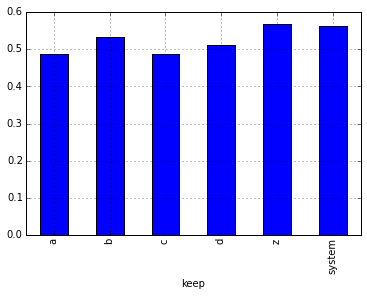

In [69]:
by_keep_ns.mean().plot(kind='bar')

### Ablation



In [70]:
by_ignore_ns = D_sub.groupby(('dataset', 'ignore')).f1.mean().unstack(1)
by_ignore_ns['system'] = system_f1
by_ignore_ns

ignore,a,b,c,d,z,system
dataset,,,,,,
comb_round2.feats,0.39,0.37,0.38,0.39,0.39,0.39
comb_round3.feats,0.62,0.63,0.63,0.64,0.62,0.62
comb_round4.feats,0.63,0.63,0.64,0.63,0.59,0.63
comb_round_all.feats,0.48,0.48,0.48,0.48,0.45,0.48
da_semcor.feats,0.59,0.58,0.61,0.60,0.57,0.60
en_framenet.feats,0.71,0.72,0.72,0.72,0.63,0.71
en_masc_crowdsourced.feats,0.45,0.47,0.45,0.45,0.33,0.45
en_ritter_sst.feats,0.50,0.50,0.56,0.53,0.52,0.50
eu_semcor.feats,0.68,0.68,0.68,0.68,0.65,0.68


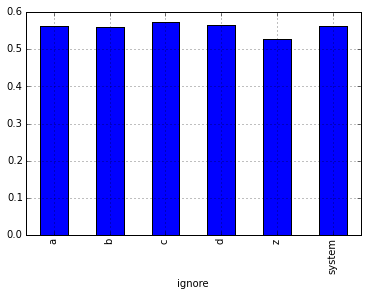

In [71]:
by_ignore_ns.mean().plot(kind='bar')